# Exploratory Data Analysis: TROPOMI

Fall 2020

Julia Longmate, Hikari Murayama, Michelle Sims, Marshall Worsham

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.ma as ma
import pandas as pd
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd

# Rasterstats contains the zonalstatistics function 
# that you will use to extract raster values
import rasterstats as rs
import earthpy as et
import earthpy.plot as ep

`01_Extract_Points_ALL_TROPOMI.py` extracts the data for VISTA points, here we explore the results for the methane rasters.

## Plot CH4 raster data (June)

In [46]:
# Load & plot the data
ch4_path = os.path.join("data","google_earth_engine", "CH4_2019.tif")

with rio.open(ch4_path) as ch4_src:
    # Masked = True sets no data values to np.nan if they are in the metadata
    ch4_data = ch4_src.read(6, masked=True)
    ch4_meta = ch4_src.profile

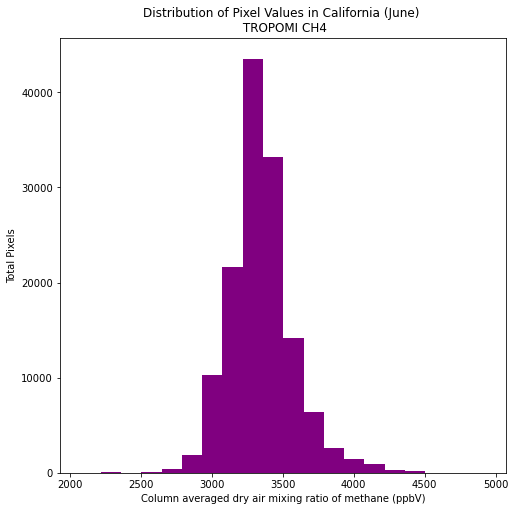

In [47]:
# Explore the data by plotting a histogram with earthpy
ax=ep.hist(ch4_data,
        figsize=(8,8),
        colors="purple",
        xlabel="Column averaged dry air mixing ratio of methane (ppbV)",
        ylabel="Total Pixels",
        title="Distribution of Pixel Values in California (June) \n TROPOMI CH4")

Methane data is overall sparse on a monthly basis. However it is clear that there is not a long tail on either side of the spectrum.

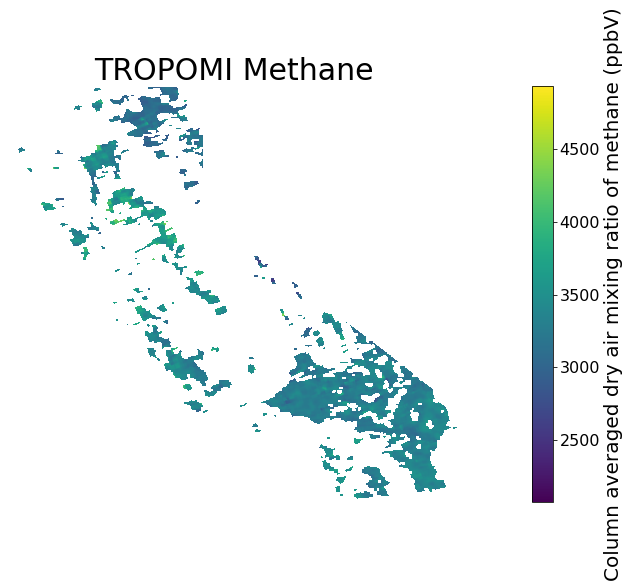

In [60]:
fig, ax = plt.subplots( figsize=(20, 8))
plt_ch4 = ax.imshow(ch4_data)
ax.set_title('TROPOMI Methane', fontsize=30)
cb = fig.colorbar(plt_ch4, ax=ax)
cb.set_label(label='Column averaged dry air mixing ratio of methane (ppbV)', fontsize=20)
cb.ax.tick_params(labelsize=16)
ax.set_aspect('equal')
ax.set_frame_on(False)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.show()

## Plot NO2 data (June)

In [49]:
# Load & plot the data
no2_path = os.path.join("data","google_earth_engine", "NO2_2019.tif")

with rio.open(no2_path) as no2_src:
    # Masked = True sets no data values to np.nan if they are in the metadata
    no2_data = no2_src.read(6, masked=True)
    no2_meta = no2_src.profile

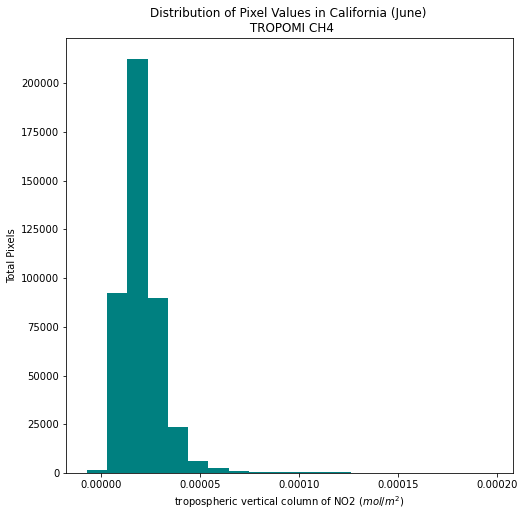

In [52]:
# Explore the data by plotting a histogram with earthpy
ax=ep.hist(no2_data,
        figsize=(8,8),
        colors="teal",
        xlabel="Tropospheric vertical column of NO2 ($mol/m^2$)",
        ylabel="Total Pixels",
        title="Distribution of Pixel Values in California (June) \n TROPOMI CH4")

NO2 cover is substantially better than for methane. There seems to be a tail towards the higher values. We see that these higher values seem to be around the more urban areas as well as in the San Joaquin valley.

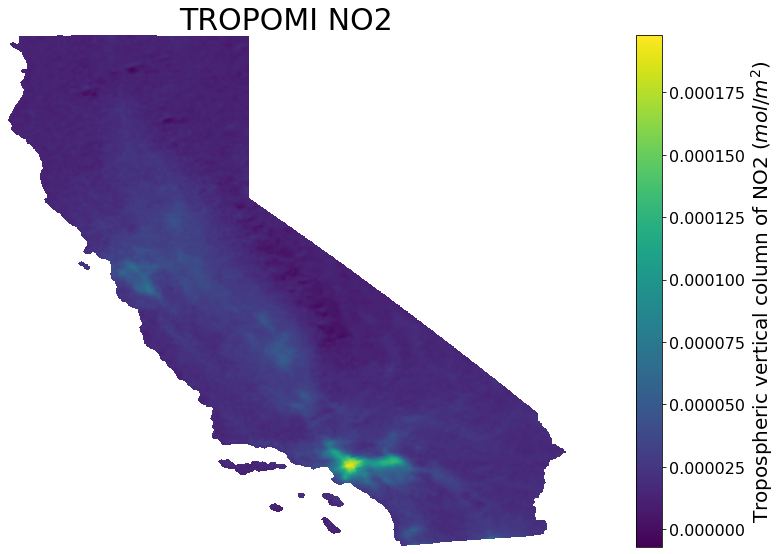

In [59]:
fig, ax = plt.subplots( figsize=(20, 8))
plt_no2 = ax.imshow(no2_data)
ax.set_title('TROPOMI NO2', fontsize=30)
cb = fig.colorbar(plt_no2, ax=ax)
cb.set_label(label='Tropospheric vertical column of NO2 ($mol/m^2$)', fontsize=20)
cb.ax.tick_params(labelsize=16)
ax.set_aspect('equal')
ax.set_frame_on(False)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.show()